In [23]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../src')

from neural_network import NeuralNetwork
from functions_helpper import get_training_data, f, g, h

# Ej 6 parte b

Considere las siguientes funciones con las entradas en el rango [-1,1] :
    
    f(x) = x3-x2+1 
    g(x,y) = 1- x2 - y2 
    h(x,y) =x+y

Utilice su implementación para ajustar estas funciones, inicializando los pesos con valores aleatorios y utilizando como ejemplos de entrenamiento 40 puntos uniformemente distribuidos en el espacio. 

Grafique:
    
    i.  el error cometido en el conjunto de entrenamiento en cada iteración;
    ii. las aproximación de las funciones obtenidas luego de 10^2, 10^3, 10^4 y 10^5 iteraciones.


In [24]:
#Ajusta y grafica los resutlados
def plot_results(neural_network: NeuralNetwork):
    
    neural_network.print()
    neural_network.fit()

    training_data = get_training_data()

    P = []
    F = []
    G = []
    H = []

    for point in training_data:
        predict = neural_network.predict(point)

        P.append(predict)

        x = point[0]
        y = point[1]
        F.append(f(x))
        G.append(g(x,y))
        H.append(h(x,y))

    plt.grid(True)
    plt.ylabel ('Max Iter='+str(max_iter))
    plt.plot(neural_network.get_errors(), color='b', label='Error')
    plt.legend (loc=0)
    plt.show ()

    plt.grid(True)
    plt.ylabel ('Max Iter='+str(max_iter))
    plt.plot(P, color='b', label='Predict')
    plt.plot(F, color='r', label='f')
    plt.legend (loc=0)
    plt.show ()

    plt.grid(True)
    plt.ylabel ('Max Iter=' + str (max_iter))
    plt.plot(P, color='b', label='Predict')
    plt.plot(G, color='r', label='g')
    plt.legend (loc=0)
    plt.show ()

    plt.grid(True)
    plt.ylabel ('Max Iter=' + str (max_iter))
    plt.plot(P, color='b', label='Predict')
    plt.plot(H, color='r', label='h')
    plt.legend (loc=0)
    plt.show ()


Inicializamos los pesos de la red de forma aleatroia.

In [25]:
hidden_layer_weights = [np.random.rand(2), np.random.rand(2)]
output_layer_weights = [np.random.rand(2)]
hidden_bias = np.random.rand(2)
output_bias = np.random.rand(1)

Para todos los casos se usaron los mismos pesos iniciales e igual disenño de red.

# Iteraciones = 10 ^2

------------------------
Amount of Inputs
2
------------------------
---> Hidden Layer
Total neurons: 2
   Neuron 0
      Weight: 0.4606860198131787
      Weight: 0.9109654039774926
      Bias: 0.8112263675474473
   Neuron 1
      Weight: 0.9499938187376641
      Weight: 0.1446638510650361
      Bias: 0.30793133306122156
------------------------
---> Output Layer
Total neurons: 1
   Neuron 0
      Weight: 0.44718357051689495
      Weight: 0.4147564993673484
      Bias: 0.1414157779071653


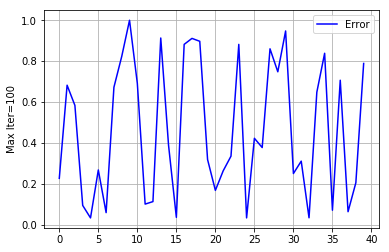

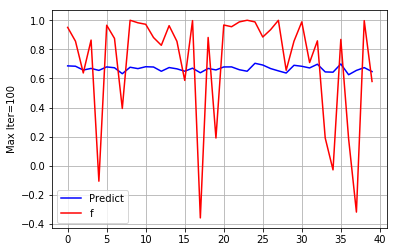

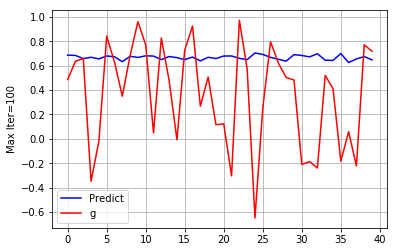

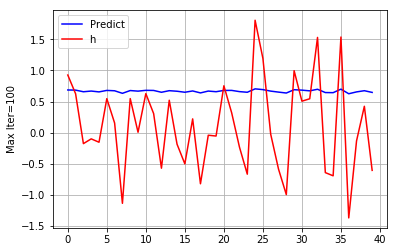

In [26]:
    max_iter = 10 ** 2
    
    #Creamos la red neuronal con 2 entradas, una capa oculta con 2 neuronas y una salida
    neural_network = NeuralNetwork(
        input_layer_size=2,
        hidden_layer_size=2,
        output_layer_size=1,
        hidden_layer_weights=hidden_layer_weights,
        output_layer_weights=output_layer_weights,
        hidden_layer_bias=hidden_bias,
        output_layer_bias=output_bias,
        max_iter=max_iter
    )
    
    plot_results(neural_network)
    

# Iteraciones = 10 ^3

------------------------
Amount of Inputs
2
------------------------
---> Hidden Layer
Total neurons: 2
   Neuron 0
      Weight: 0.4606860198131787
      Weight: 0.9109654039774926
      Bias: 0.8112263675474473
   Neuron 1
      Weight: 0.9499938187376641
      Weight: 0.1446638510650361
      Bias: 0.30793133306122156
------------------------
---> Output Layer
Total neurons: 1
   Neuron 0
      Weight: 0.44718357051689495
      Weight: 0.4147564993673484
      Bias: 0.1414157779071653


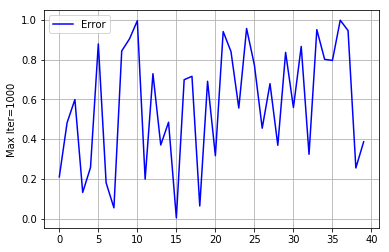

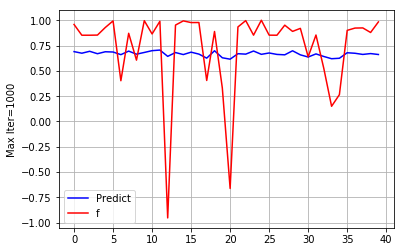

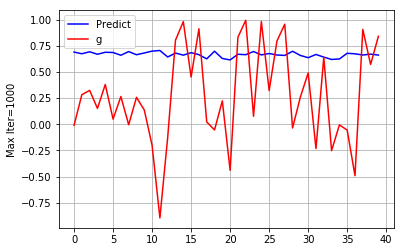

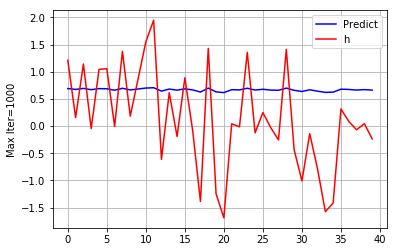

In [27]:
    max_iter = 10 ** 3
    
    #Creamos la red neuronal con 2 entradas, una capa oculta con 2 neuronas y una salida
    neural_network = NeuralNetwork(
        input_layer_size=2,
        hidden_layer_size=2,
        output_layer_size=1,
        hidden_layer_weights=hidden_layer_weights,
        output_layer_weights=output_layer_weights,
        hidden_layer_bias=hidden_bias,
        output_layer_bias=output_bias,
        max_iter=max_iter
    )
    
    plot_results(neural_network)

# Iteraciones = 10 ^4

------------------------
Amount of Inputs
2
------------------------
---> Hidden Layer
Total neurons: 2
   Neuron 0
      Weight: 0.4606860198131787
      Weight: 0.9109654039774926
      Bias: 0.8112263675474473
   Neuron 1
      Weight: 0.9499938187376641
      Weight: 0.1446638510650361
      Bias: 0.30793133306122156
------------------------
---> Output Layer
Total neurons: 1
   Neuron 0
      Weight: 0.44718357051689495
      Weight: 0.4147564993673484
      Bias: 0.1414157779071653


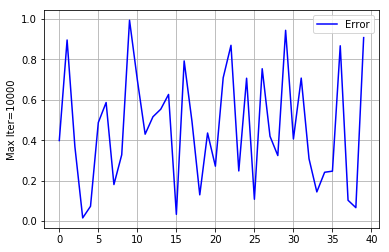

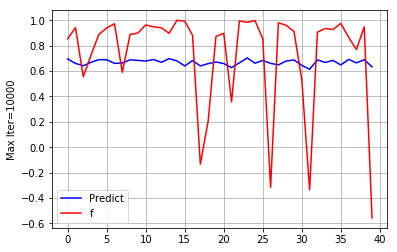

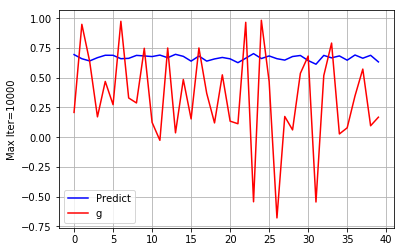

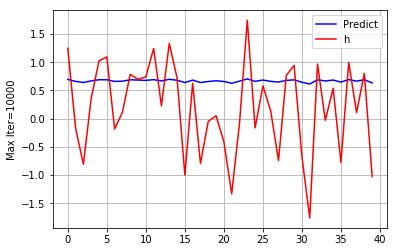

In [28]:
    max_iter = 10 ** 4
    
    #Creamos la red neuronal con 2 entradas, una capa oculta con 2 neuronas y una salida
    neural_network = NeuralNetwork(
        input_layer_size=2,
        hidden_layer_size=2,
        output_layer_size=1,
        hidden_layer_weights=hidden_layer_weights,
        output_layer_weights=output_layer_weights,
        hidden_layer_bias=hidden_bias,
        output_layer_bias=output_bias,
        max_iter=max_iter
    )
    
    plot_results(neural_network)

# Iteraciones = 10 ^5

------------------------
Amount of Inputs
2
------------------------
---> Hidden Layer
Total neurons: 2
   Neuron 0
      Weight: 0.4606860198131787
      Weight: 0.9109654039774926
      Bias: 0.8112263675474473
   Neuron 1
      Weight: 0.9499938187376641
      Weight: 0.1446638510650361
      Bias: 0.30793133306122156
------------------------
---> Output Layer
Total neurons: 1
   Neuron 0
      Weight: 0.44718357051689495
      Weight: 0.4147564993673484
      Bias: 0.1414157779071653


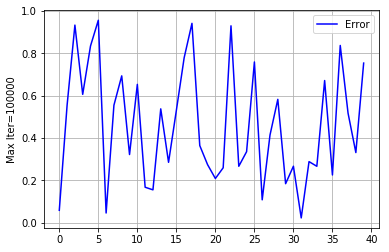

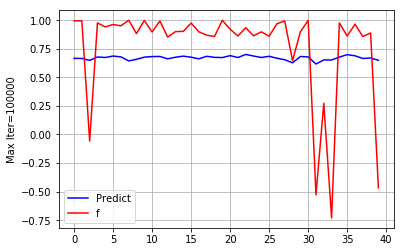

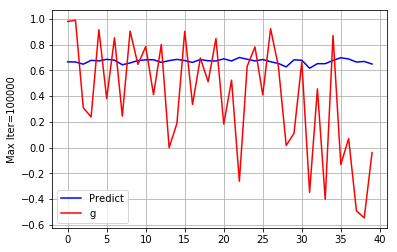

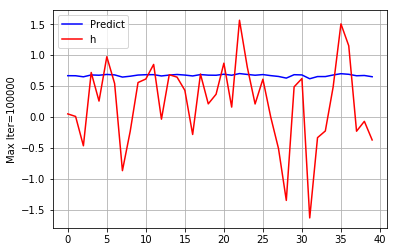

In [29]:
    max_iter = 10 ** 5
    
    #Creamos la red neuronal con 2 entradas, una capa oculta con 2 neuronas y una salida
    neural_network = NeuralNetwork(
        input_layer_size=2,
        hidden_layer_size=2,
        output_layer_size=1,
        hidden_layer_weights=hidden_layer_weights,
        output_layer_weights=output_layer_weights,
        hidden_layer_bias=hidden_bias,
        output_layer_bias=output_bias,
        max_iter=max_iter
    )
    
    plot_results(neural_network)